                                Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Years in current job Home Ownership 

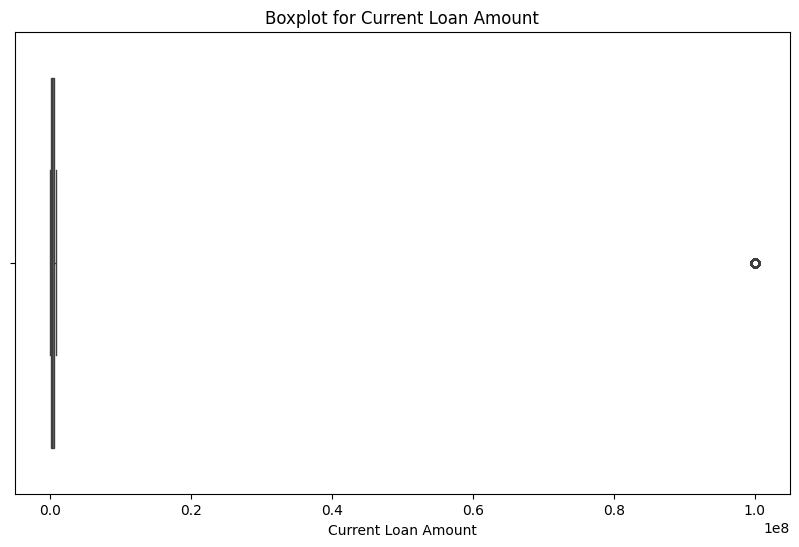

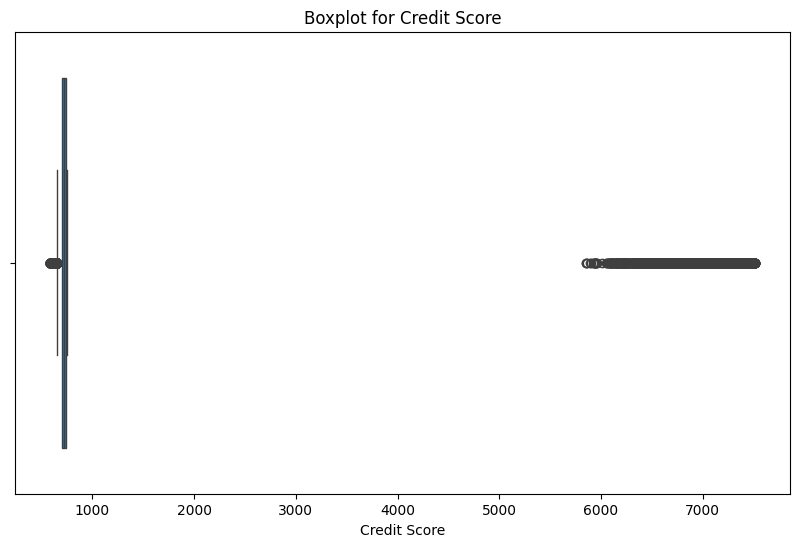

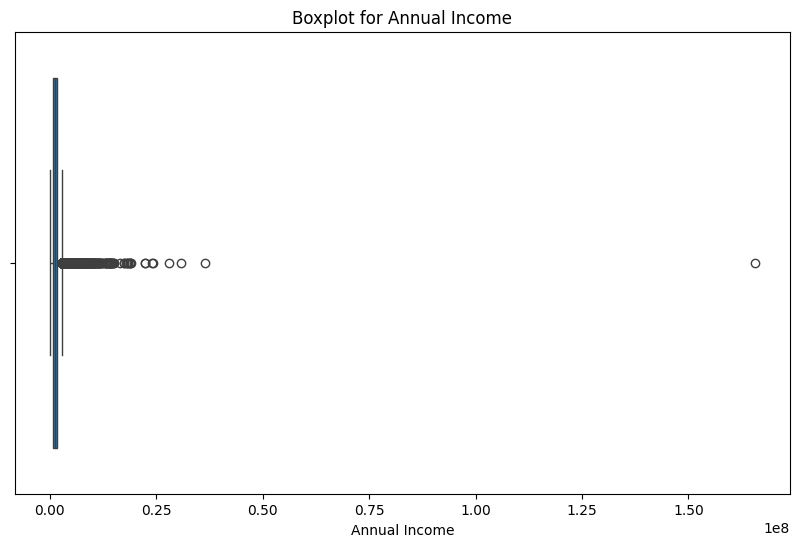

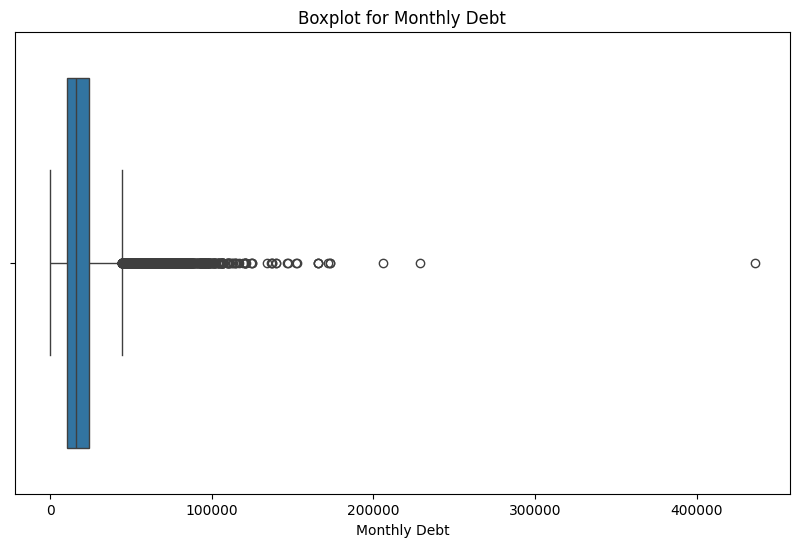

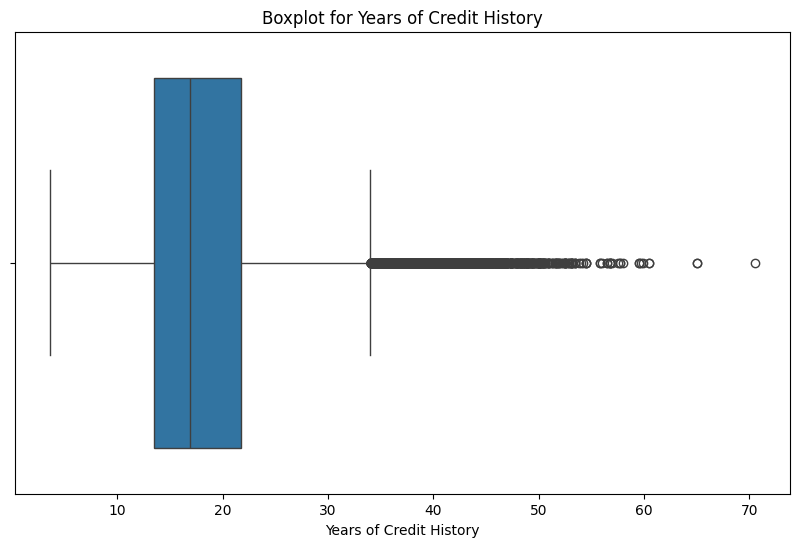

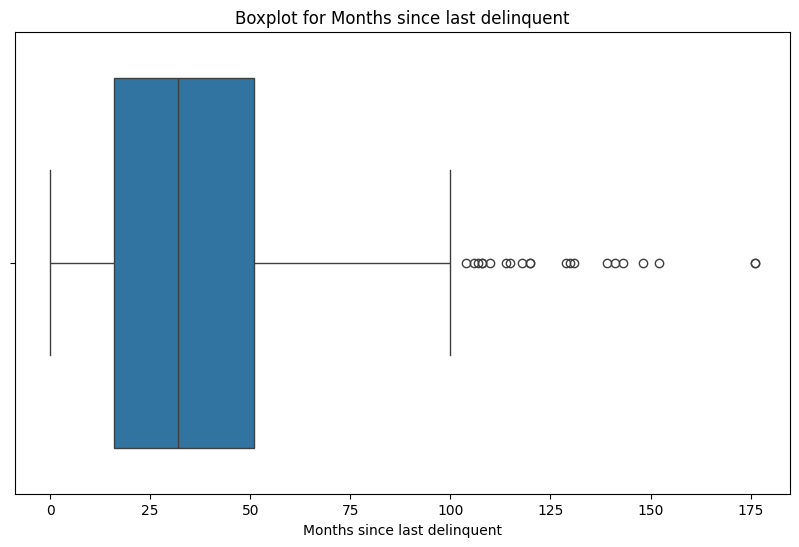

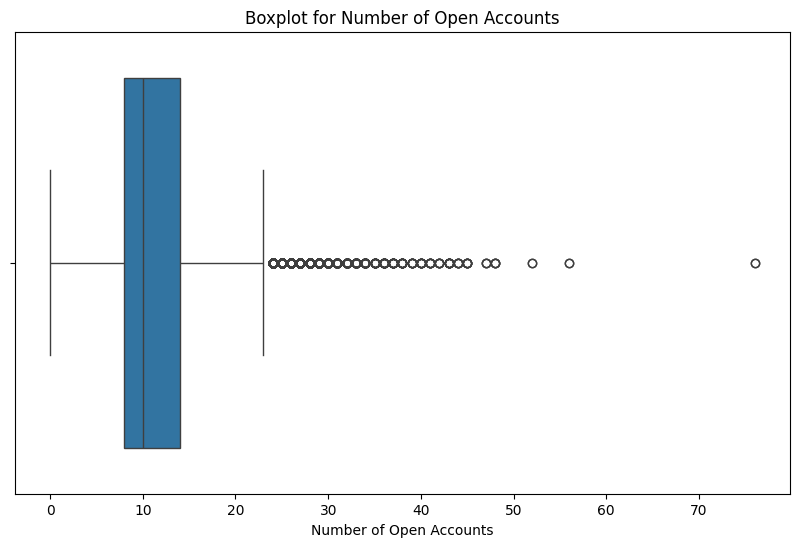

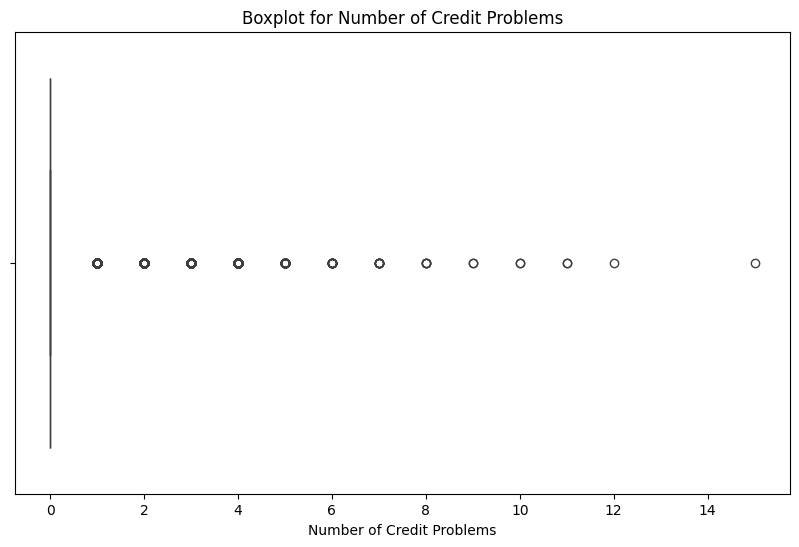

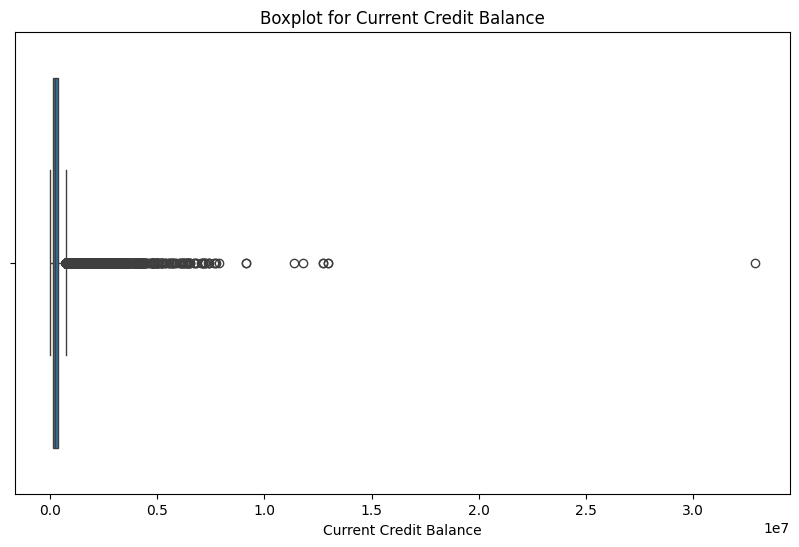

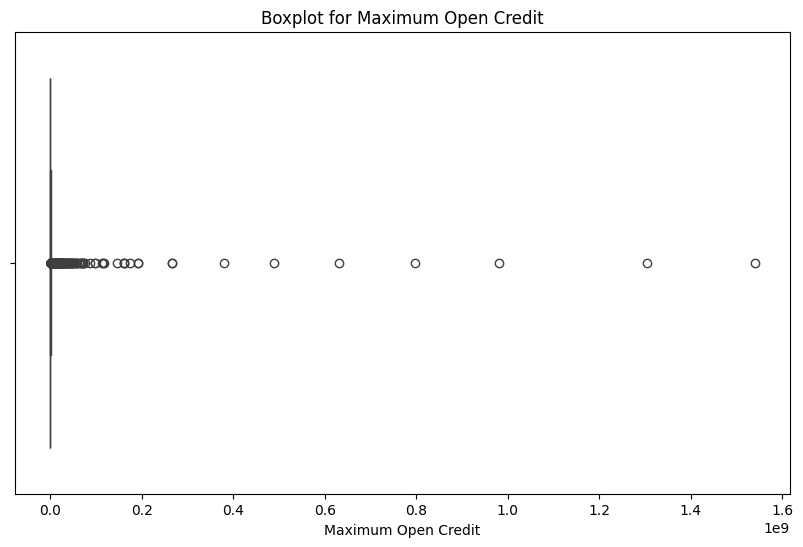

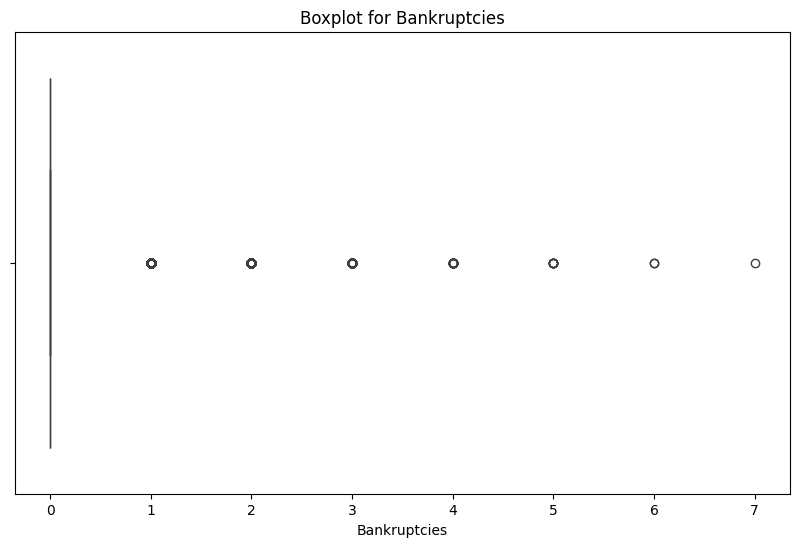

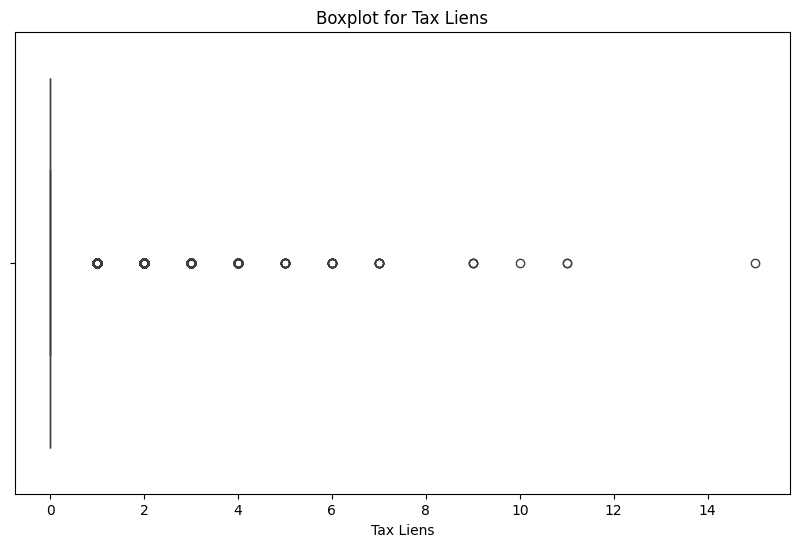

Unique values in Loan ID: ['14dd8831-6af5-400b-83ec-68e61888a048'
 '4771cc26-131a-45db-b5aa-537ea4ba5342'
 '4eed4e6a-aa2f-4c91-8651-ce984ee8fb26' ...
 '81ab928b-d1a5-4523-9a3c-271ebb01b4fb'
 'c63916c6-6d46-47a9-949a-51d09af4414f' nan]
Unique values in Customer ID: ['981165ec-3274-42f5-a3b4-d104041a9ca9'
 '2de017a3-2e01-49cb-a581-08169e83be29'
 '5efb2b2b-bf11-4dfd-a572-3761a2694725' ...
 '3e45ffda-99fd-4cfc-b8b8-446f4a505f36'
 '1b3014be-5c07-4d41-abe7-44573c375886' nan]
Unique values in Loan Status: ['Fully Paid' 'Charged Off' nan]
Unique values in Term: ['Short Term' 'Long Term' nan]
Unique values in Years in current job: ['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']
Unique values in Home Ownership: ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage' nan]
Unique values in Purpose: ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small

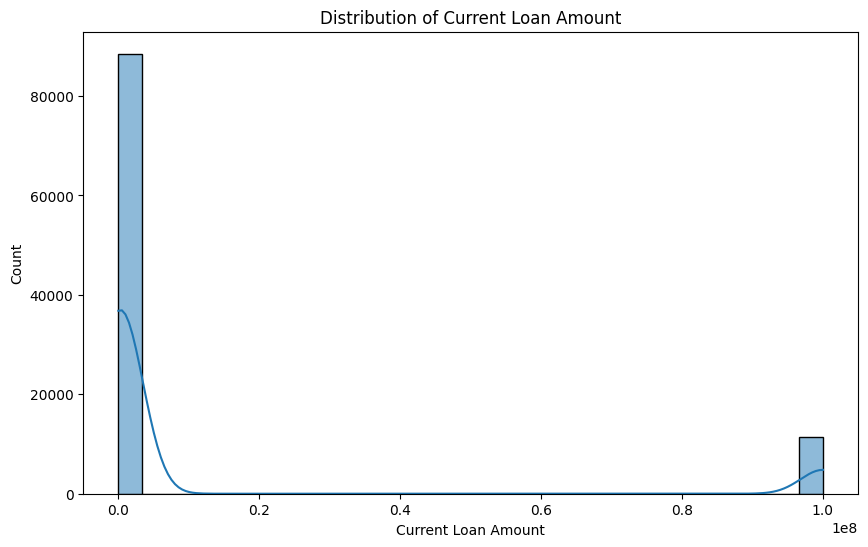

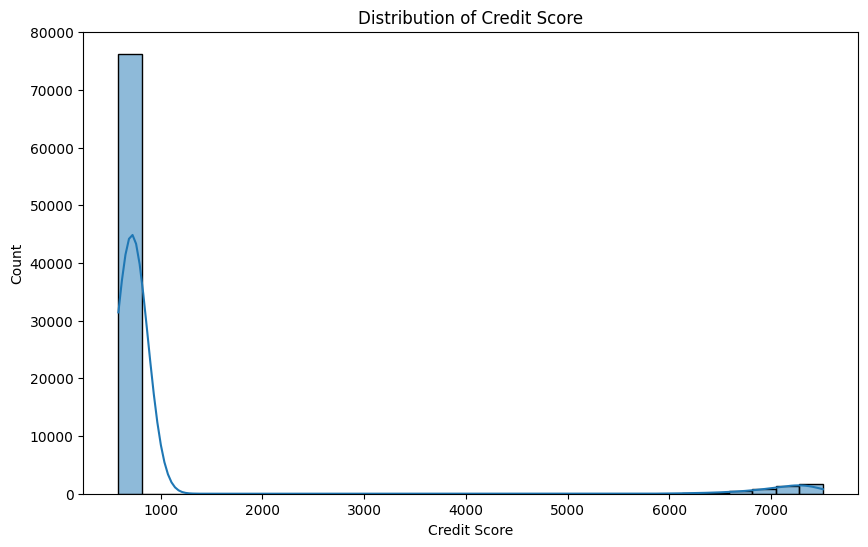

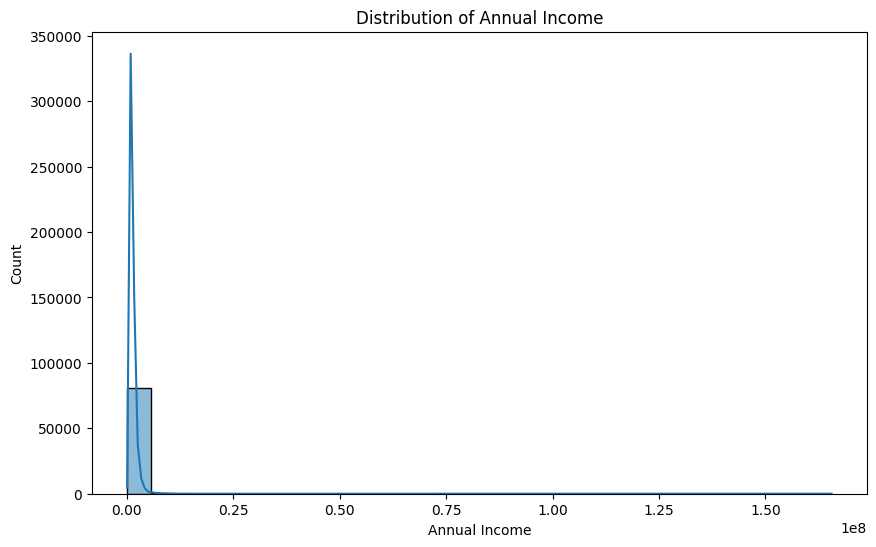

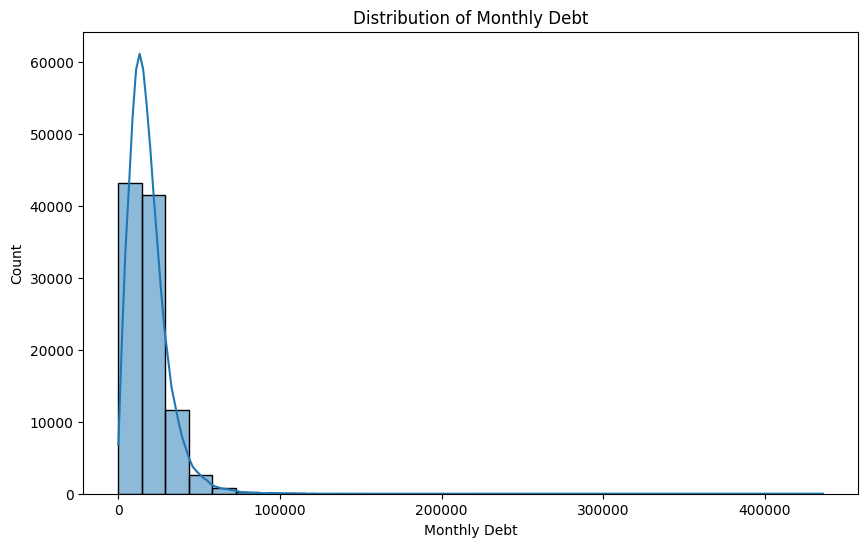

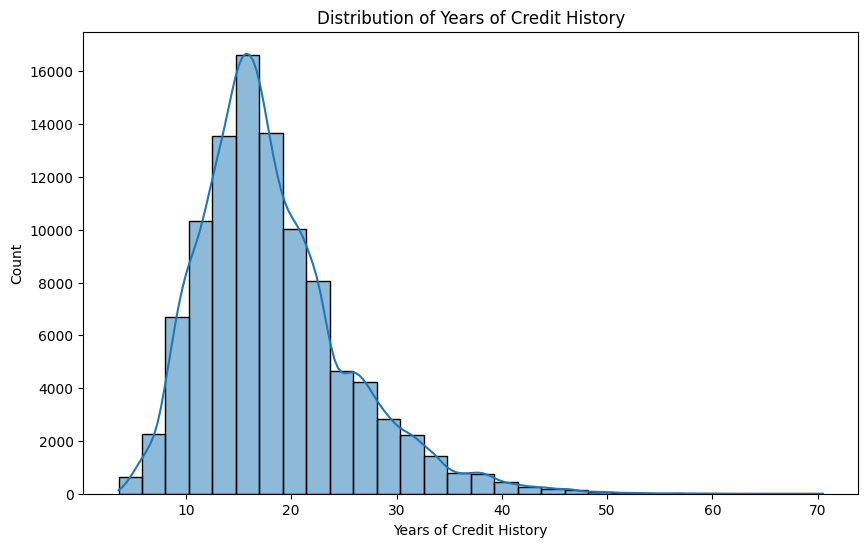

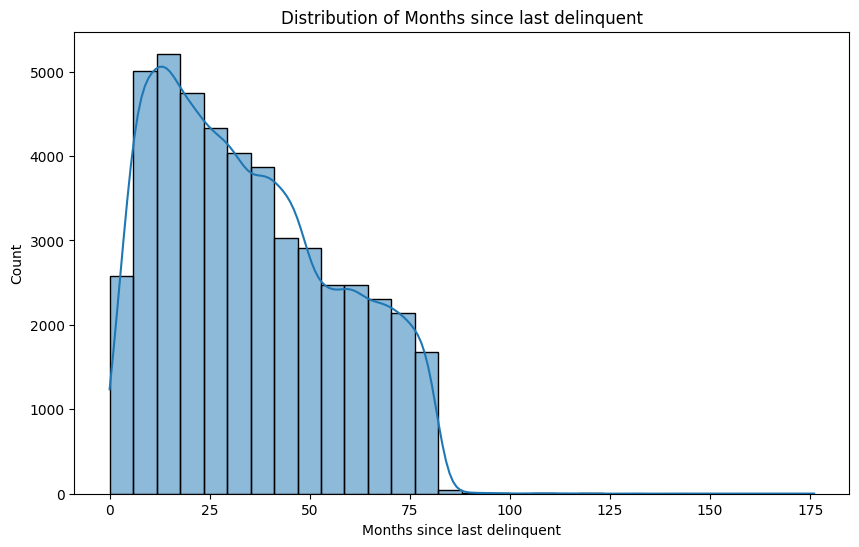

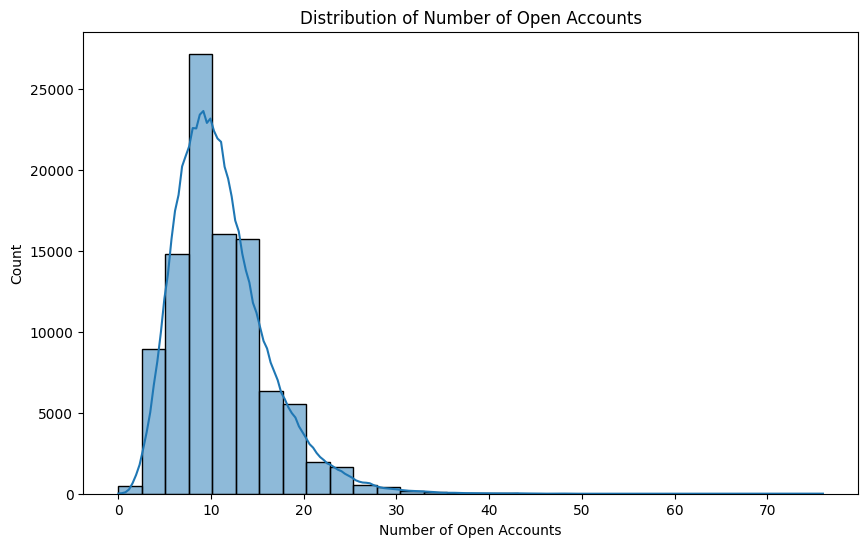

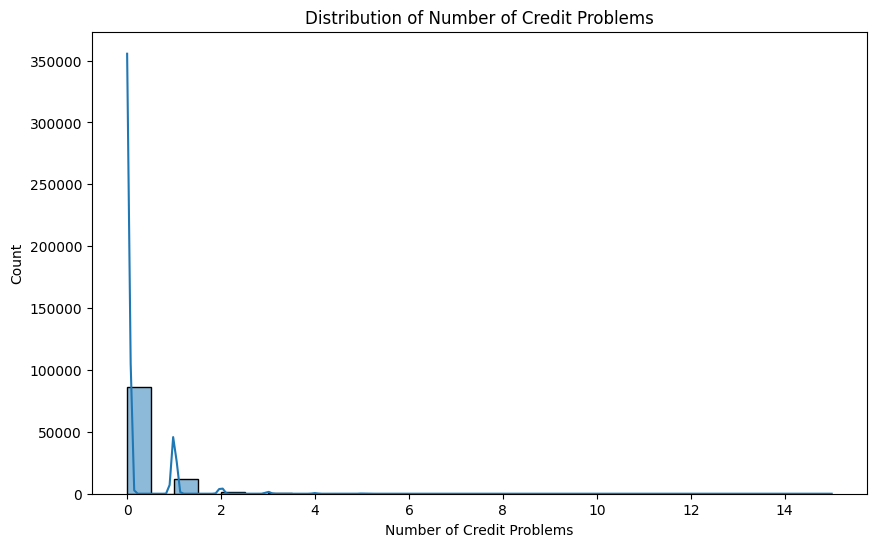

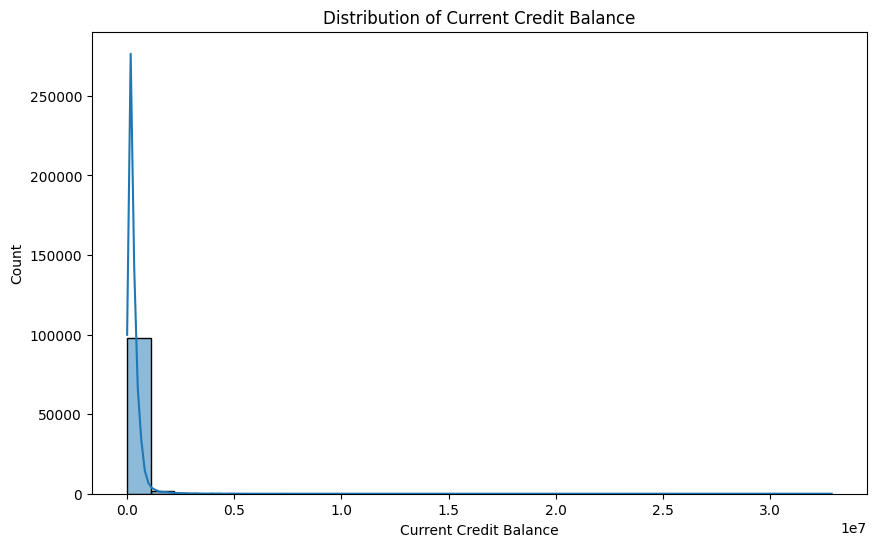

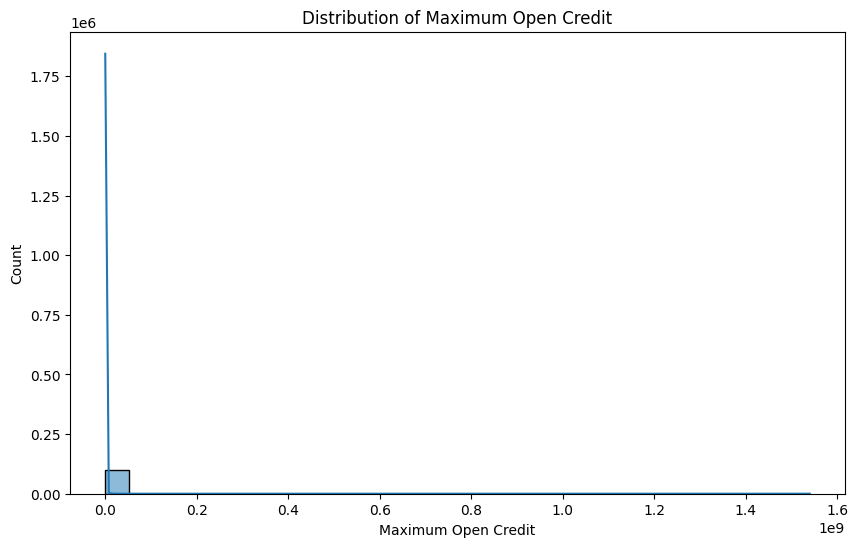

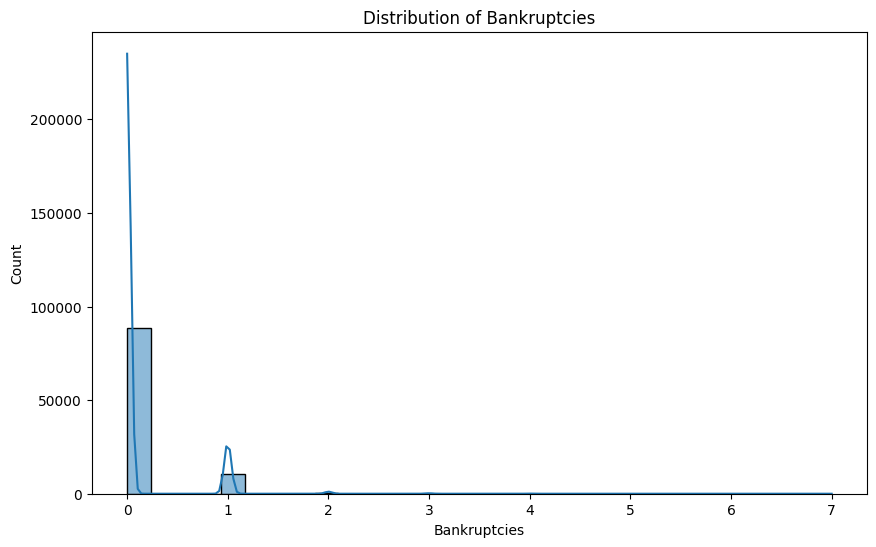

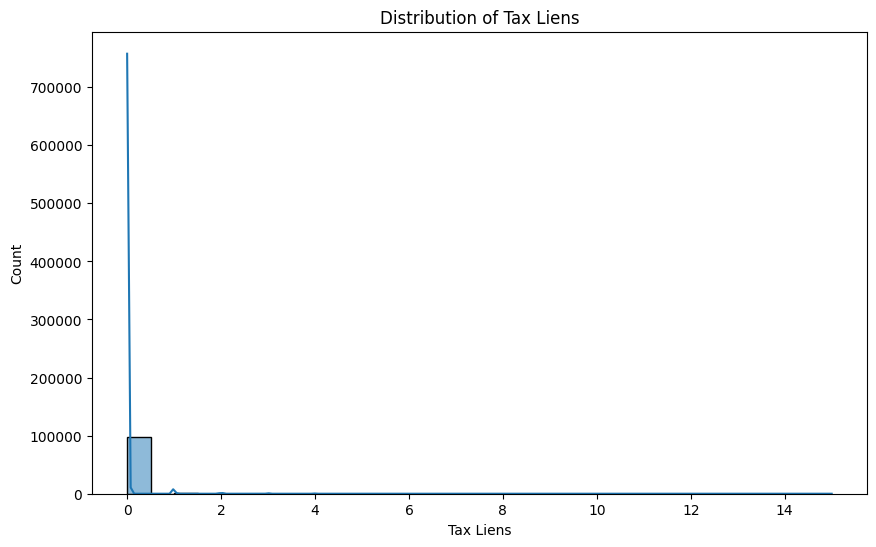

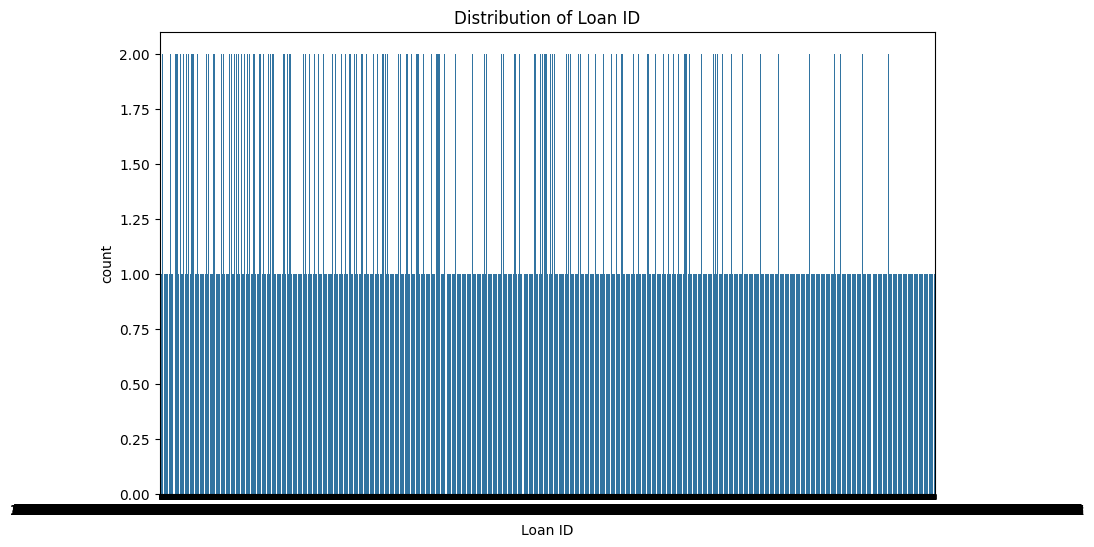

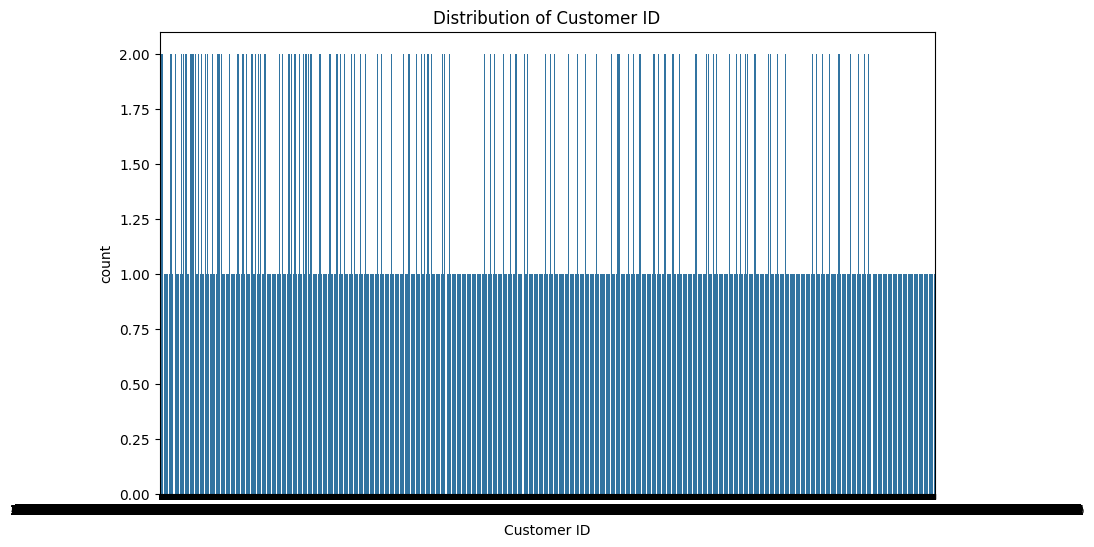

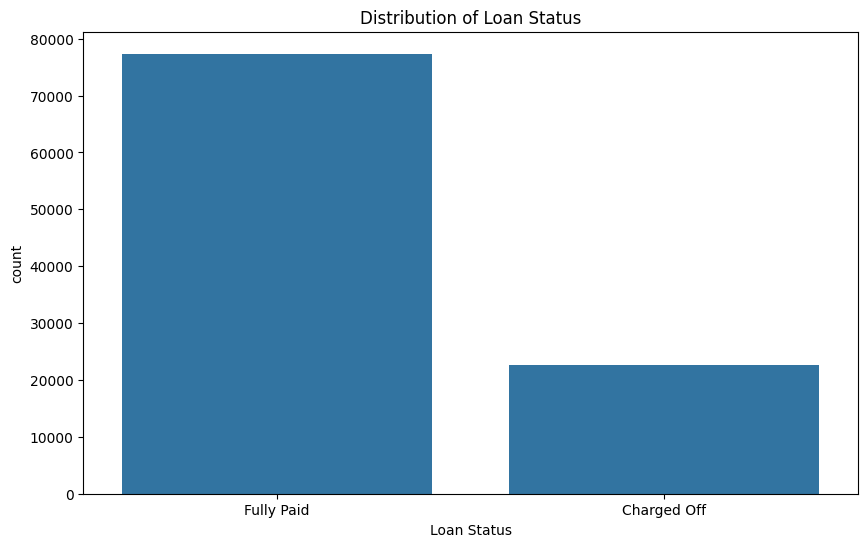

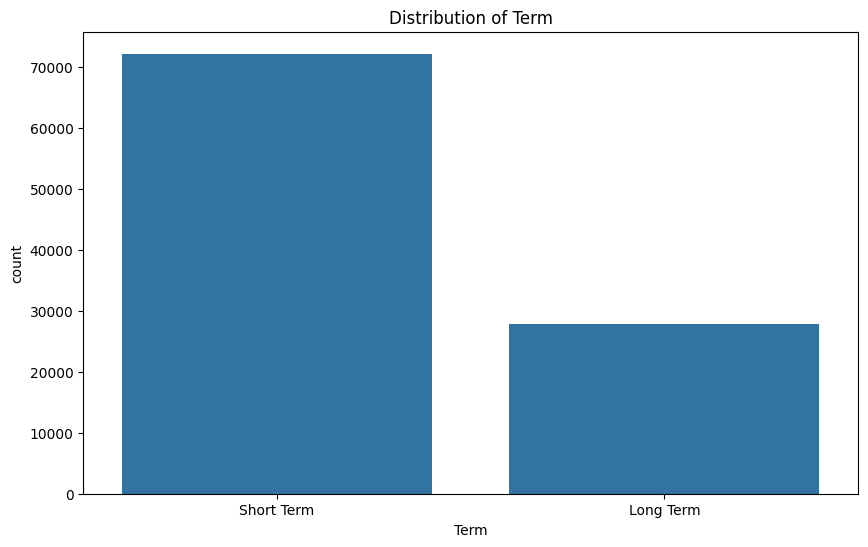

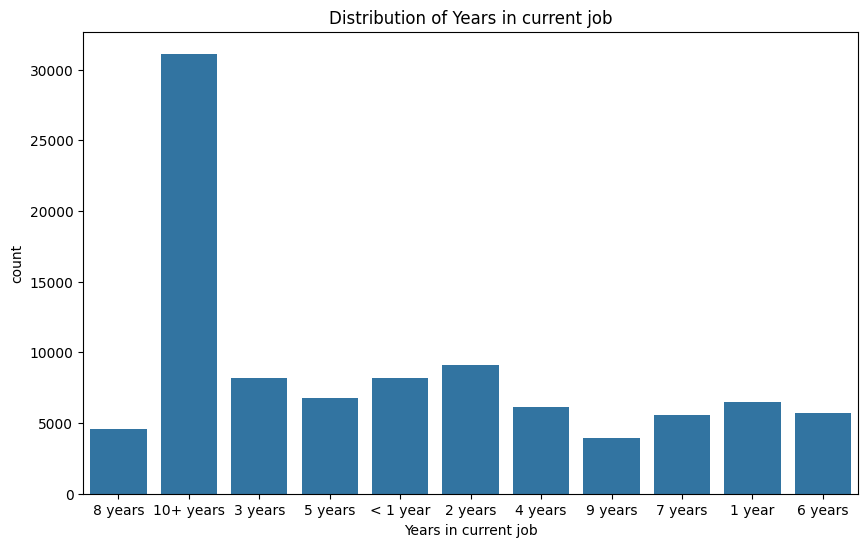

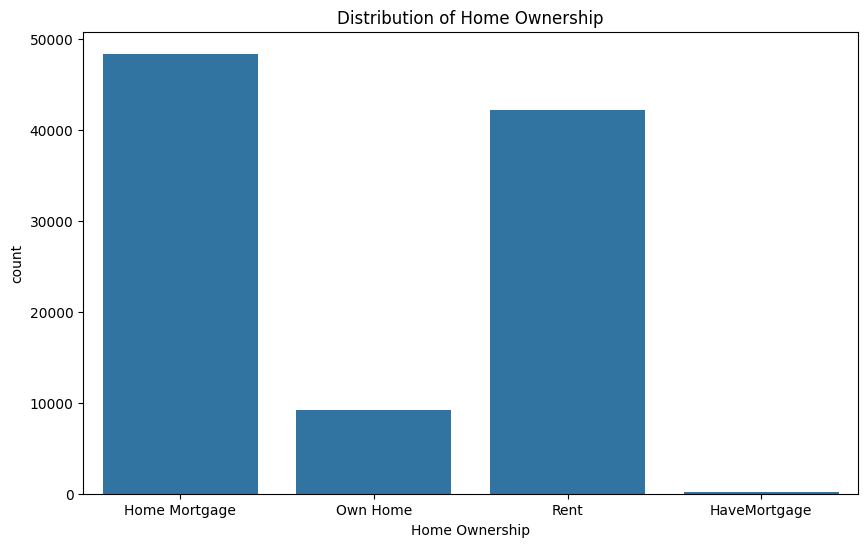

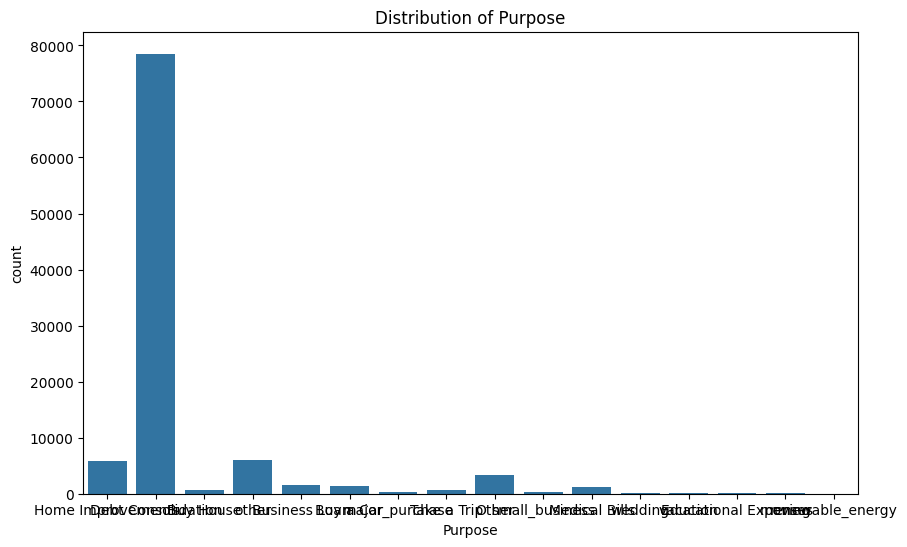

Number of duplicate customer IDs: 18514
Summary of Data Quality Checks:
Missing values per column:
Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64
Percentage of missing values per column:
Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372

In [1]:
import pandas as pd
import os

SOURCE_CSV_FILE = os.path.abspath("./datasets/dataset-for-bank-loan-prediction.csv")
# Đọc dữ liệu từ file CSV
data = pd.read_csv(SOURCE_CSV_FILE)

# Hiển thị những dòng đầu tiên của dữ liệu
print(data.head())

# Kiểm tra kích thước dữ liệu
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

# Hiển thị thông tin về dữ liệu
print(data.info())

# Hiển thị các thống kê mô tả
print(data.describe(include='all'))

# Kiểm tra số lượng giá trị bị thiếu trong mỗi cột
missing_values = data.isnull().sum()
print(missing_values)

# Tính toán tỷ lệ giá trị bị thiếu
missing_percentage = (missing_values / data.shape[0]) * 100
print(missing_percentage)

import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ boxplot cho các cột số để phát hiện giá trị ngoại lai
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Kiểm tra các giá trị duy nhất trong các cột phân loại (categorical columns)
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")

# Kiểm tra các giá trị hợp lệ cho một số cột nhất định (ví dụ: cột Term)
valid_term_values = ["Short Term", "Long Term"]  # Ví dụ, chỉ chấp nhận Long Term và Short Term
invalid_term_entries = data[~data['Term'].isin(valid_term_values)]
print(f"Invalid term entries: {invalid_term_entries}")

# Biểu đồ phân phối cho các cột số
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Biểu đồ phân phối cho các cột phân loại
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.show()


# Giả sử bạn có cột 'customer_id' là khóa chính, kiểm tra các giá trị trùng lặp
duplicate_customer_ids = data['Loan ID'].duplicated().sum()
print(f"Number of duplicate customer IDs: {duplicate_customer_ids}")

# Kiểm tra các quan hệ khóa ngoại nếu có
# Ví dụ, nếu có cột 'product_id' trong bảng giao dịch, kiểm tra xem tất cả các giá trị có tồn tại trong bảng sản phẩm không
# product_data = pd.read_csv('path_to_product_file.csv')
# invalid_product_ids = data[~data['product_id'].isin(product_data['product_id'])]
# print(f"Invalid product IDs: {invalid_product_ids}")

# Tổng hợp kết quả và đề xuất
print("Summary of Data Quality Checks:")
print(f"Missing values per column:\n{missing_values}")
print(f"Percentage of missing values per column:\n{missing_percentage}")
print(f"Number of duplicate customer IDs: {duplicate_customer_ids}")
# In các kiểm tra khác nếu có

# Đề xuất cải thiện:
# - Xử lý missing values: sử dụng phương pháp fillna() hoặc loại bỏ hàng/cột chứa nhiều missing values
# - Xử lý outliers: sử dụng các phương pháp như winsorization, transformation, hoặc loại bỏ
# - Kiểm tra và sửa các giá trị không hợp lệ trong các cột phân loại

